In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

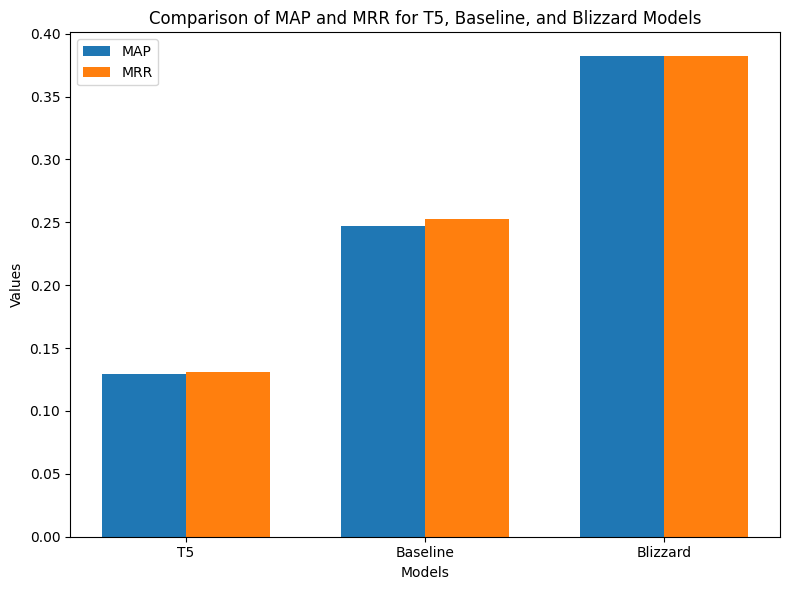

In [2]:
import matplotlib.pyplot as plt

# Data
models = ['T5', 'Baseline', 'Blizzard']
map_values = [0.12954419895001987, 0.24675, 0.3819642857142857]
mrr_values = [0.13062934809437954, 0.2526111111111111, 0.38196428571428565]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Width of the bars
bar_width = 0.35

# Bar positions
bar_positions1 = [1, 2, 3]
bar_positions2 = [x + bar_width for x in bar_positions1]

# Create bar plots for MAP and MRR
ax.bar(bar_positions1, map_values, bar_width, label='MAP')
ax.bar(bar_positions2, mrr_values, bar_width, label='MRR')

# Set axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of MAP and MRR for T5, Baseline, and Blizzard Models')
ax.set_xticks([x + bar_width / 2 for x in bar_positions1])
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


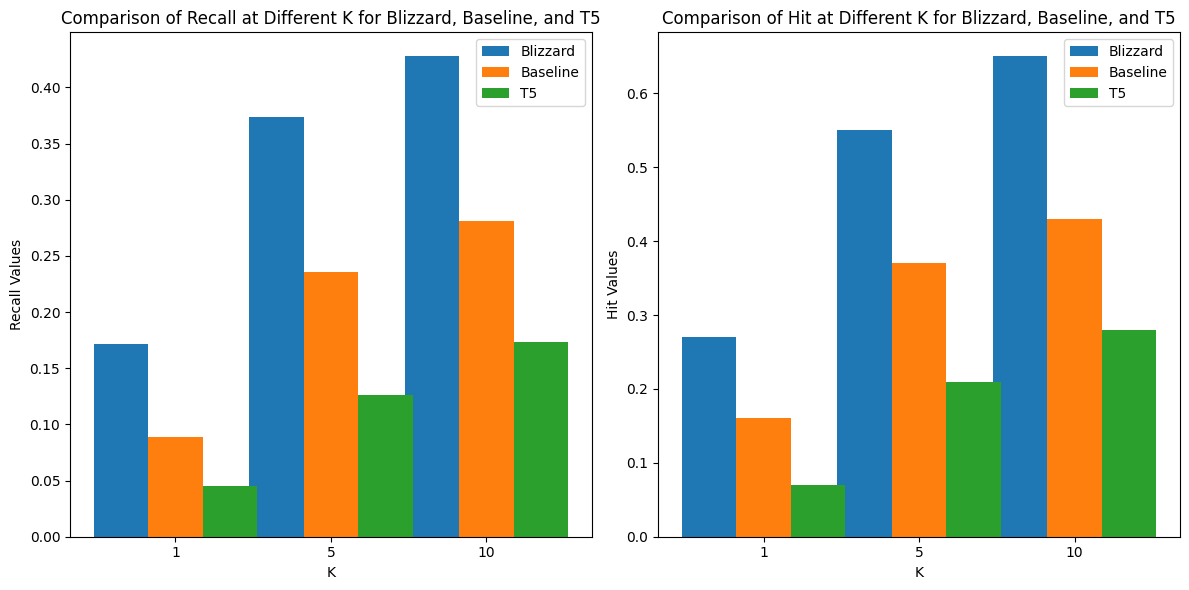

In [3]:
import matplotlib.pyplot as plt

# Data for Baseline
blizzard_recall = [0.17160256410256408, 0.3732692307692308, 0.42760256410256403]
blizzard_hit = [0.27, 0.55, 0.65]

baseline_recall = [0.0891025641025641, 0.23576923076923076, 0.28076923076923077]
baseline_hit = [0.16, 0.37, 0.43]

# Data for T5
t5_recall = [0.045, 0.12576923076923077, 0.17326923076923076]
t5_hit = [0.07, 0.21, 0.28]

# Create a figure and axis for Recall comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Width of the bars
bar_width = 0.35

# Bar positions
bar_positions1 = [1, 2, 3]
bar_positions2 = [x + bar_width for x in bar_positions1]

# Create bar plots for Recall comparison
ax1.bar(bar_positions1, blizzard_recall, bar_width, label='Blizzard')
ax1.bar(bar_positions2, baseline_recall, bar_width, label='Baseline')
ax1.bar([x + 2 * bar_width for x in bar_positions1], t5_recall, bar_width, label='T5')

# Set axis labels and title for Recall comparison
ax1.set_xlabel('K')
ax1.set_ylabel('Recall Values')
ax1.set_title('Comparison of Recall at Different K for Blizzard, Baseline, and T5')
ax1.set_xticks([x + bar_width for x in bar_positions1])
ax1.set_xticklabels(['1', '5', '10'])
ax1.legend()

# Create bar plots for Hit comparison
ax2.bar(bar_positions1, blizzard_hit, bar_width, label='Blizzard')
ax2.bar(bar_positions2, baseline_hit, bar_width, label='Baseline')
ax2.bar([x + 2 * bar_width for x in bar_positions1], t5_hit, bar_width, label='T5')

# Set axis labels and title for Hit comparison
ax2.set_xlabel('K')
ax2.set_ylabel('Hit Values')
ax2.set_title('Comparison of Hit at Different K for Blizzard, Baseline, and T5')
ax2.set_xticks([x + bar_width for x in bar_positions1])
ax2.set_xticklabels(['1', '5', '10'])
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()


Log statistics

In [2]:
# import csv file into pandas dataframe
log_df = pd.read_csv('../../Data/Log/keyphrase-generation-t5-small-inspec-20230806_0305-log_history.csv')
log_df.head()

,loss,learning_rate,epoch,step,eval_loss,eval_rouge1,eval_rouge2,eval_rougeL,eval_rougeLsum,eval_gen_len,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,3.0396,0.000050,0.22,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.4038,0.000050,0.43,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.2576,0.000049,0.65,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.1818,0.000049,0.86,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.00,465,2.025201,6.8409,0.2726,6.5081,6.5201,18.8935,45.261,22.403,1.414,NaN,NaN,NaN,NaN,NaN


In [3]:
# drop the rows where loss is NaN
log_df = log_df.dropna(subset=['loss'])

In [4]:
log_df.head()

,loss,learning_rate,epoch,step,eval_loss,eval_rouge1,eval_rouge2,eval_rougeL,eval_rougeLsum,eval_gen_len,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,3.0396,0.000050,0.22,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.4038,0.000050,0.43,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.2576,0.000049,0.65,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.1818,0.000049,0.86,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.1527,0.000049,1.08,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


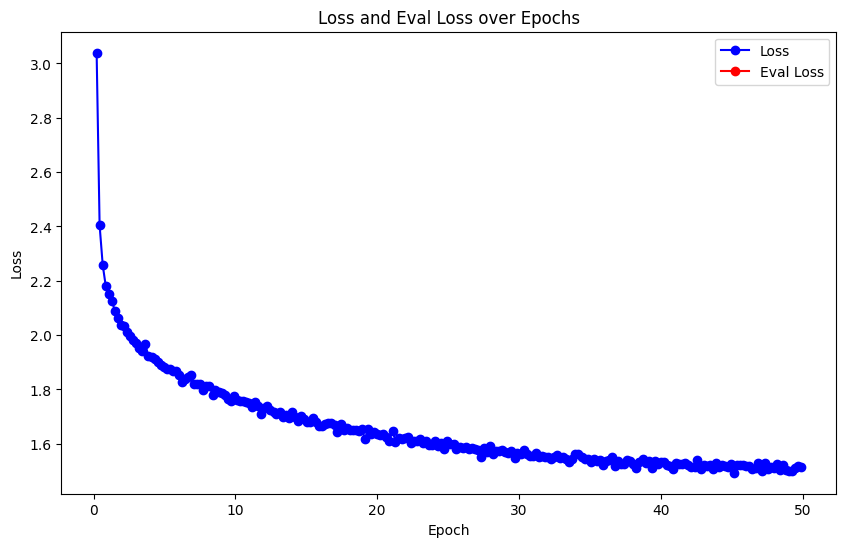

In [8]:
# Plotting the graph
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot the 'loss' data
plt.plot(log_df['epoch'], log_df['loss'], label='Loss', marker='o', color='blue')

# Plot the 'eval_loss' data
plt.plot(log_df['epoch'], log_df['eval_loss'], label='Eval Loss', marker='o', color='red')

# Set the labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss and Eval Loss over Epochs')

# Add a legend
plt.legend()

# Display the graph
plt.show()

In [10]:
# import csv file into pandas dataframe
log_df_2 = pd.read_csv('../../Data/Log/keyphrase-generation-t5-small-inspec-20230806_0305-log_history.csv')
log_df_2.head()

,loss,learning_rate,epoch,step,eval_loss,eval_rouge1,eval_rouge2,eval_rougeL,eval_rougeLsum,eval_gen_len,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,3.0396,0.000050,0.22,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.4038,0.000050,0.43,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.2576,0.000049,0.65,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.1818,0.000049,0.86,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.00,465,2.025201,6.8409,0.2726,6.5081,6.5201,18.8935,45.261,22.403,1.414,NaN,NaN,NaN,NaN,NaN


In [11]:
# drop the rows where eval_loss is NaN
log_df_2 = log_df_2.dropna(subset=['eval_loss'])

ValueError: x and y must have same first dimension, but have shapes (232,) and (50,)

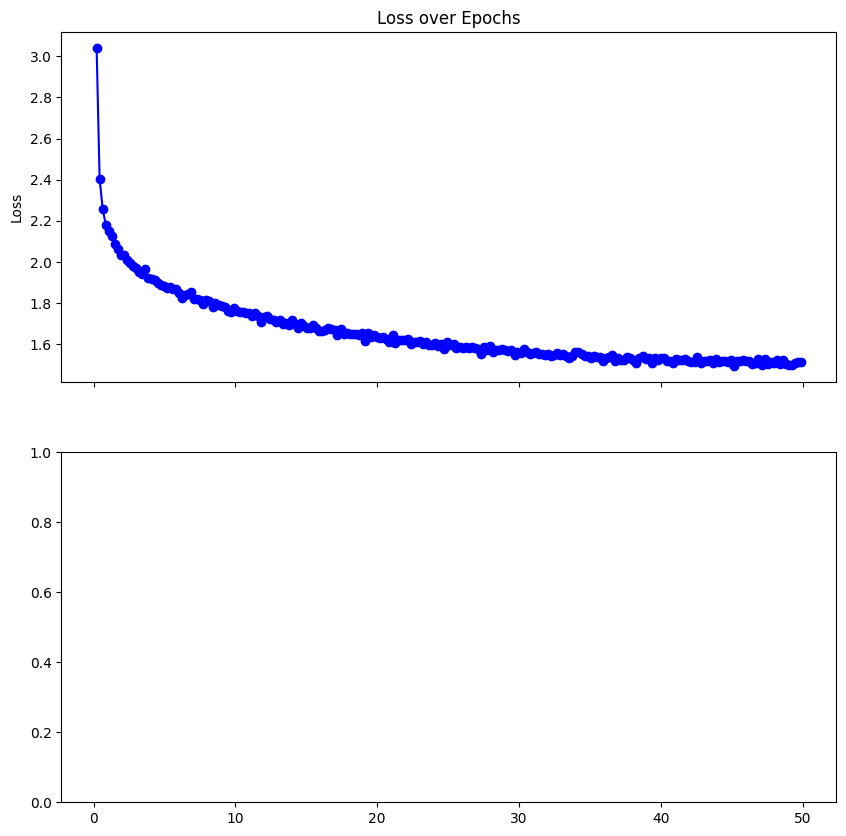

In [12]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot the 'loss' data
ax1.plot(log_df['epoch'], log_df['loss'], label='Loss', marker='o', color='blue')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over Epochs')

# Plot the 'eval_loss' data
ax2.plot(log_df['epoch'], log_df_2['eval_loss'], label='Eval Loss', marker='o', color='red')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Eval Loss')
ax2.set_title('Eval Loss over Epochs')

# Add legends
ax1.legend()
ax2.legend()

# Display the graphs
plt.tight_layout()
plt.show()

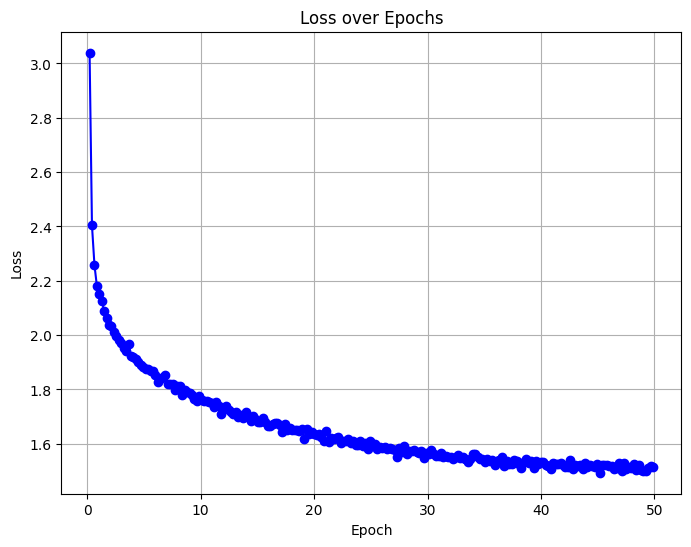

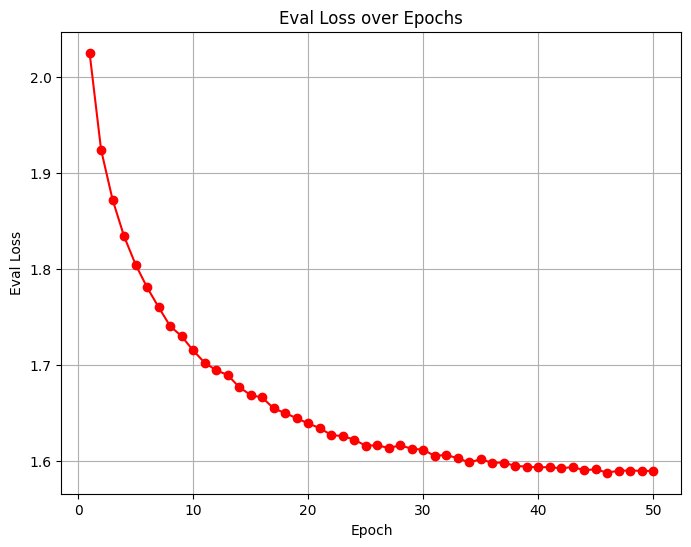

In [13]:
# Plotting 'loss' data
plt.figure(figsize=(8, 6))
plt.plot(log_df['epoch'], log_df['loss'], marker='o', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()

# Plotting 'eval_loss' data
plt.figure(figsize=(8, 6))
plt.plot(log_df_2['epoch'], log_df_2['eval_loss'], marker='o', color='red')
plt.xlabel('Epoch')
plt.ylabel('Eval Loss')
plt.title('Eval Loss over Epochs')
plt.grid(True)
plt.show()